In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


link = "https://ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
nombres_colum = ['year', 'month', 'day', "SSN"]

datos_todos = pd.read_csv(link, delim_whitespace=True, skiprows=2, names=nombres_colum)

datos_todos['fecha'] = pd.to_datetime(datos_todos[['year', 'month', 'day']])

fecha_limite = pd.to_datetime("2012-01-01")
datos_hasta_2012 = datos_todos[datos_todos['fecha'] < fecha_limite]
columna_cuarta = datos_hasta_2012['SSN'].to_numpy().astype(int)
array_columna_3 = datos_hasta_2012['day'].to_numpy()
dias = np.arange(1, len(array_columna_3)+ 1)

<font size="5">**Punto 1**.</font>



<font size="4">***Inciso 1.1***.</font>


In [145]:
ruido_x = 0.5 * np.random.normal(size=dias.shape)
dias_perturbados = dias + ruido_x
y=columna_cuarta
frecuencia_muestreo=1 #De los datos uno puede ver que es aproximadamente un día.
frecuencias=np.fft.fftfreq(len(y),frecuencia_muestreo)
transformada=np.fft.fft(y)
modulo=np.abs(transformada)
modulo_sin_corrimiento=modulo[1:] #Tocó quitar el primero porque por mucho ruido que le metí no funcionó.
indice_max=np.argmax(modulo_sin_corrimiento)
modulo_max,frecuencia_principal=modulo[indice_max+1],np.abs(frecuencias[indice_max+1])
periodo=(1/frecuencia_principal)/365
print("El período del ciclo de actividad solar es " + str(periodo)+ " años")


El período del ciclo de actividad solar es 11.173972602739726 años


<font size="4">***Inciso 1.2***.</font>


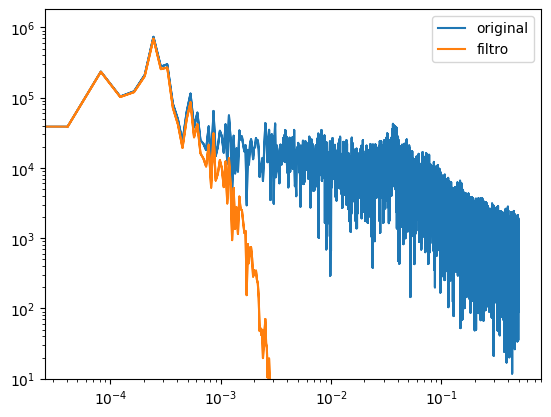

In [146]:
#1.2.a
frecuencias_abs=np.abs(frecuencias)

def gauss(alpha,f):
    return np.exp(-(alpha*f)**2)

t_filtrada=transformada*gauss(1000,frecuencias_abs)

plt.plot(frecuencias_abs,modulo,label="original")

plt.plot(frecuencias_abs,np.abs(t_filtrada),label="filtro")

plt.ylim(10,)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

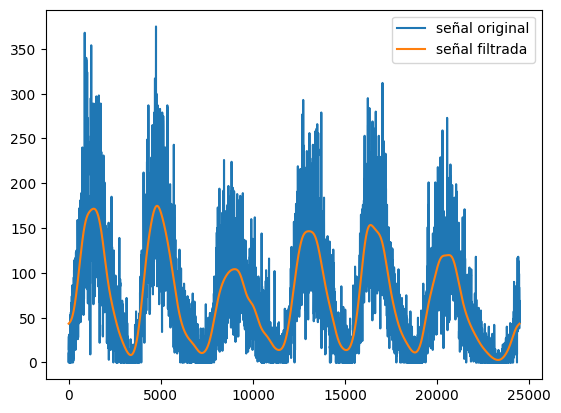

In [147]:
#1.2.b
señal_filtra=np.fft.ifft(t_filtrada)
rial_my_nigga=np.real(señal_filtra)

plt.plot(dias,y,label="señal original")

plt.plot(dias,rial_my_nigga,label="señal filtrada")
plt.legend()
plt.show()


<font size="4">***Inciso 1.3***.</font>